[IPython Notebook](t0s.ipynb) |  [Python Script](t0s.py)

Various t0s
============================

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

And let's make our system a little more interesting so that we can discriminate between the various t0s

In [3]:
b.set_value('sma@binary', 20)
b.set_value('q', 0.8)
b.set_value('ecc', 0.8)
b.set_value('per0', 45)

t0 Parameters
---------------

There are three t0 parameters that are available to define an orbit (but only one of which is editable at any given time), as well as a t0 parameter for the entire system.  Let's first access the three t0 parameters for our binary orbit.

't0_supconj' defines the time at which the primary component in our orbit is at superior conjunction.  For a binary system in which there are eclipses, this is defined as the primary eclipse.  By default this parameter is editable.

In [4]:
b.get_parameter('t0_supconj', context='component')

<Parameter: t0_supconj=0.0 d | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

't0_perpass' defines the time at which both components in our orbit is at periastron passage.  By default this parameter is *constrained* by 't0_supconj'.  For more details or information on how to change which parameter is editable, see the [Constraints Tutorial](constraints.html).

In [5]:
b.get_parameter('t0_perpass', context='component')

<Parameter: t0_perpass=-0.00917148802319 d | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [6]:
b.get_parameter('t0_perpass', context='constraint')

<ConstraintParameter: {t0_perpass@binary@component} = t0_supconj_to_perpass({t0_supconj@binary@component}, {period@binary@component}, {ecc@binary@component}, {per0@binary@component}) => -0.00917148802319 d>

The 't0_ref' defines the time at which the primary component in our orbit passes an arbitrary reference point.  This 't0_ref' is defined in the same way as PHOEBE legacy's 'HJD0' parameter, so is included for convenience translating between the two.

In [7]:
b.get_parameter('t0_ref', context='component')

<Parameter: t0_ref=0.115828511977 d | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

In [8]:
b.get_parameter('t0_ref', context='constraint')

<ConstraintParameter: {t0_ref@binary@component} = t0_supconj_to_ref({t0_supconj@binary@component}, {period@binary@component}, {ecc@binary@component}, {per0@binary@component}) => 0.115828511977 d>

In addition, there is a single 't0' parameter that is system-wide.  This parameter simply defines the time at which **all** parameters are defined and therefore at which all computations start.  The value of this parameter begins to play an important role if any parameter is given a time-derivative (see [apsidal motion](apsidal_motion.html) for an example) or when using N-body instead of Keplerian dynamics (coming in a future release).

In [9]:
b.get_parameter('t0', context='system')

<Parameter: t0=0.0 d | keys: description, value, quantity, default_unit, limits, visible_if, copy_for>

Influence on Oribits (positions)
-----------------

In [10]:
b.add_dataset('orb', times=np.linspace(-1,1,1001))

<ParameterSet: 3 parameters | contexts: compute, dataset>

In [11]:
b.run_compute(ltte=False)

<ParameterSet: 14 parameters | components: primary, secondary>

To visualize where these times are with respect to the orbits, we can plot the model orbit and highlight the positions of each star at the times defined by these parameters.  Note here that the observer is in the **positive** w-direction.

NOTE: sending z=0 will override the default of ordering in z by vs (the unused coordinate in the same system), which can be expensive to draw.

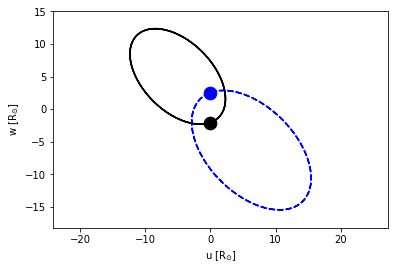

In [12]:
afig, mplfig = b.plot(x='us', y='ws', z=0, time='t0_supconj', show=True)

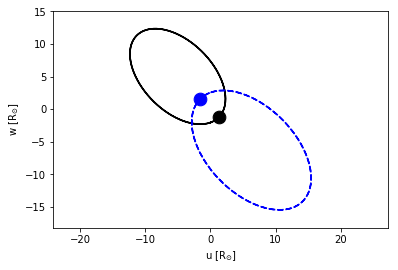

In [13]:
afig, mplfig = b.plot(x='us', y='ws', z=0, time='t0_perpass', show=True)

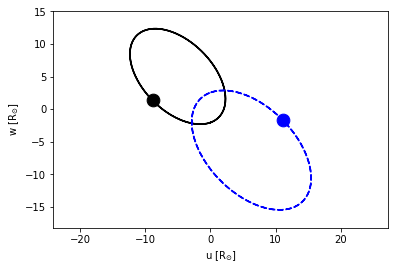

In [14]:
afig, mplfig = b.plot(x='us', y='ws', z=0, time='t0_ref', show=True)

Influence on Phasing
-----------

All computations in PHOEBE 2 are done in the time-domain.  Times can be translated to phases using any ephemeris available, as well as any of the t0s.

By default (if not passing any options), times will be phased using the outer-most orbit in the system and using 't0_supconj'.

In [15]:
b.to_phase(0.0)

0.0

In [16]:
b.to_phase(0.0, component='binary', t0='t0_supconj')

0.0

In [17]:
b.to_phase(0.0, component='binary', t0='t0_perpass')

0.009171488023191924

In [18]:
b.to_phase(0.0, component='binary', t0='t0_ref')

-0.11582851197687938

Similarly, if plotting phases on any axis, passing the 't0' keyword will set the zero-phase accordingly.  To see this, let's compute a light curve and phase it with the various t0s shown in the orbits above.

In [19]:
b.add_dataset('lc', times=np.linspace(0,1,51), ld_func='linear', ld_coeffs=[0.0])

<ParameterSet: 17 parameters | contexts: compute, dataset>

In [20]:
b.run_compute(ltte=False, irrad_method='none', atm='blackbody')

Thu, 11 Oct 2018 15:02 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 16 parameters | kinds: orb, lc>

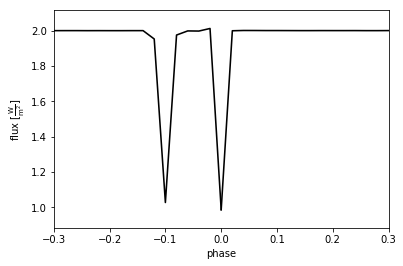

In [21]:
afig, mplfig = b['lc01@model'].plot(x='phases', t0='t0_supconj', xlim=(-0.3,0.3), show=True)

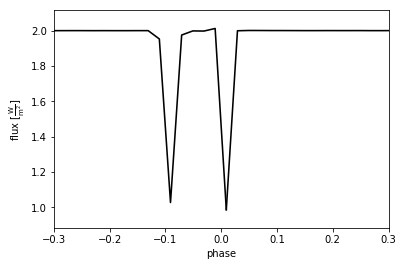

In [22]:
afig, mplfig = b['lc01@model'].plot(x='phases', t0='t0_perpass', xlim=(-0.3,0.3), show=True)

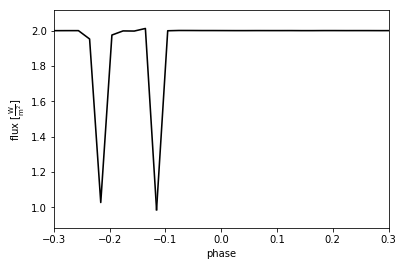

In [23]:
afig, mplfig = b['lc01@model'].plot(x='phases', t0='t0_ref', xlim=(-0.3,0.3), show=True)